In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from warnings import filterwarnings
filterwarnings("ignore")

In [531]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [532]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [533]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


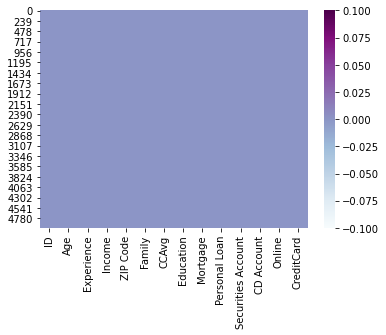

In [535]:
sns.heatmap(data.isnull(),cmap='BuPu',cbar=True)
plt.show()

### **No Missing Data and no nulls**

In [536]:
data.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Observations
-Most of the data are normally distributed with few outliers.

-The Minimum value of Experiance is negative , more of investigation is needed to clean this data.


## Data Preprocessing

In [537]:
data['Experience'].value_counts()


 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 15    119
 8     119
 6     119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

**There are 3 values in the Experiance Column are negative**

In [538]:

data['Experience'][data['Experience'] < 0] = data['Experience'].mean()

In [539]:
data['Experience'].value_counts()


32.0000    154
20.0000    148
9.0000     147
5.0000     146
23.0000    144
35.0000    143
25.0000    142
28.0000    138
18.0000    137
19.0000    135
26.0000    134
24.0000    131
3.0000     129
14.0000    127
16.0000    127
30.0000    126
34.0000    125
17.0000    125
27.0000    125
29.0000    124
22.0000    124
7.0000     121
15.0000    119
8.0000     119
6.0000     119
10.0000    118
13.0000    117
33.0000    117
11.0000    116
37.0000    116
36.0000    114
21.0000    113
4.0000     113
31.0000    104
12.0000    102
38.0000     88
2.0000      85
39.0000     85
1.0000      74
0.0000      66
40.0000     57
20.1046     52
41.0000     43
42.0000      8
43.0000      3
Name: Experience, dtype: int64

**The negative values got cleaned and replaced with mean**

In [540]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009344,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977008,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009344,0.977008,1.000000,-0.049054,-0.028488,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.017695,-0.055269,-0.049054,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028488,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045488,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048708,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018097,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013378,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014045,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


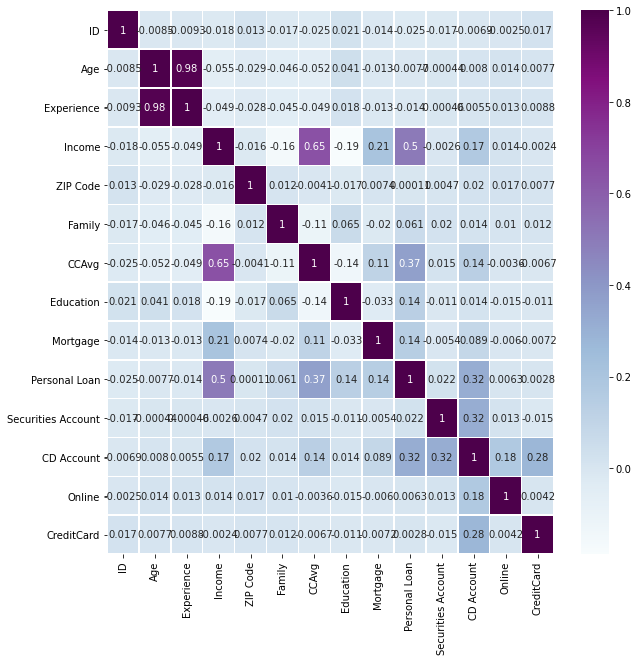

In [541]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

### Observation:
Age and Experience are highly correlated and the correlation is almost 1.

'Income' and ‘ann_CCAvg' is moderately correlated.

Personal Loan has maximum correlation with 'Income’, ann_'CCAvg', 'CD Account', 'Mortgage', and 'Education'.

We can see in heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', ‘ann_CCAvg' and 'Income'.

'Mortgage' has moderate correlation with 'Income' which is about 12%.

'Income' influences ‘ann_CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.


## Visualization of Data

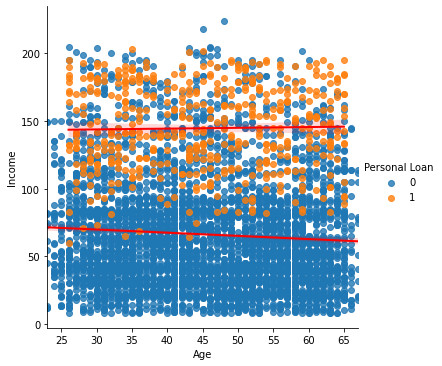

In [542]:
sns.lmplot(x="Age", y="Income", data=data,hue='Personal Loan',line_kws={"lw":2 ,'color': 'red'},height=5);

**Clients with income more than 100k are more likely to get loan**

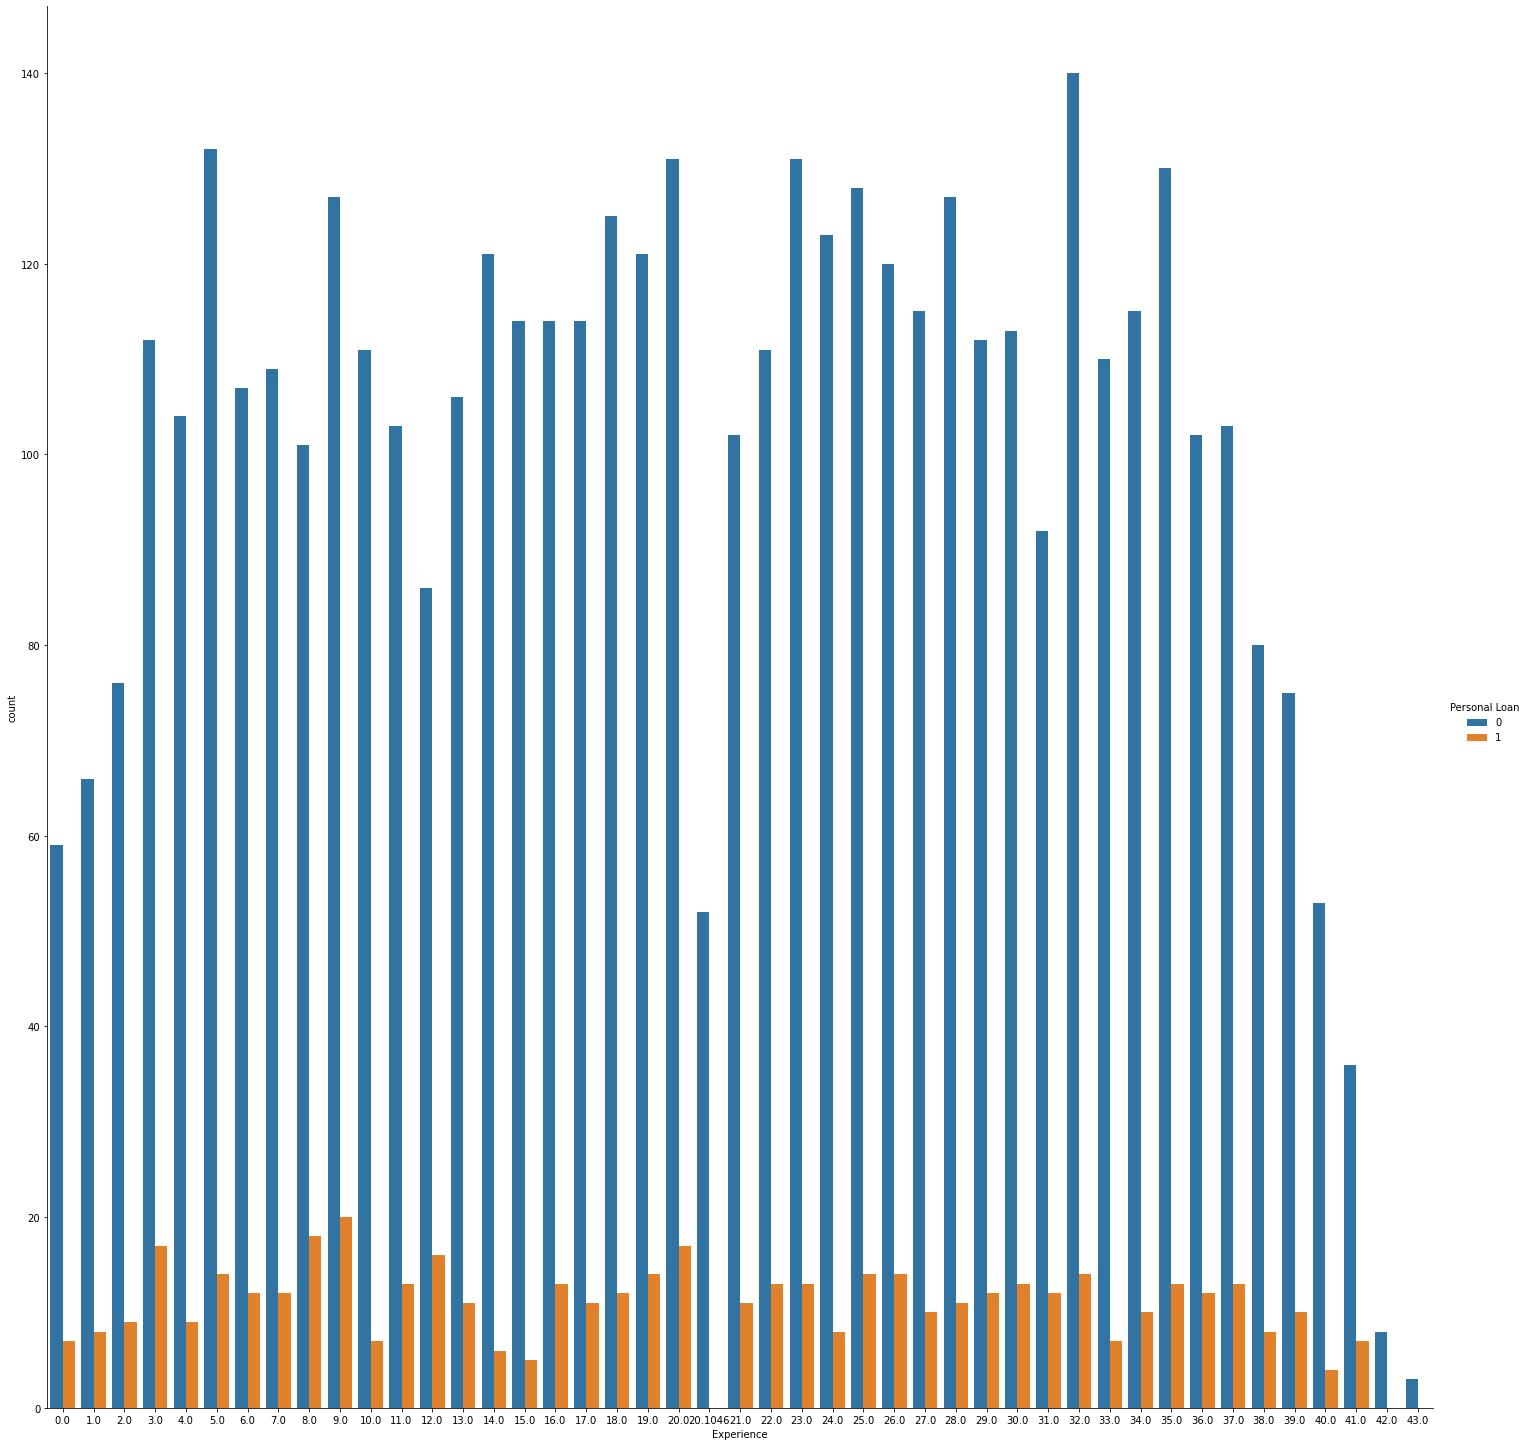

In [543]:
sns.catplot(x="Experience", hue='Personal Loan', kind="count", data=data,height=20, aspect=1)

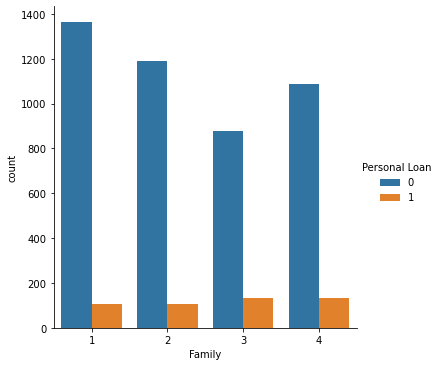

In [544]:
sns.catplot(x="Family", hue='Personal Loan', kind="count", data=data)

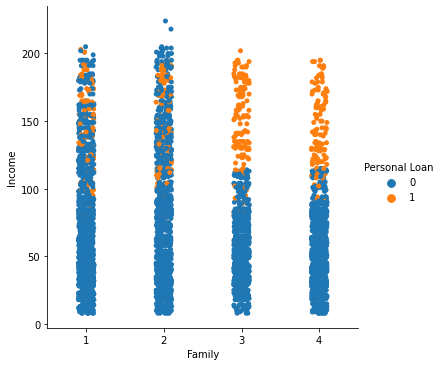

In [545]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = data, kind='strip')

## Observations
-it's noticed from the above 2 columns that experiance and family as standalone attributes doesn't affect the personal loan 
while family members with 3 more and income above 100k are more likely to get the loan

-also ID and Zipcode is not affecting the personal loan attribute

<AxesSubplot:xlabel='CreditCard', ylabel='CD Account'>

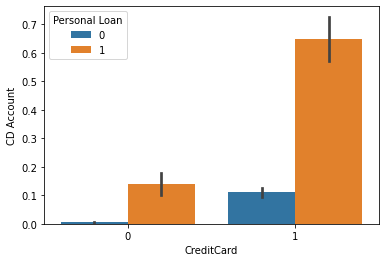

In [546]:
sns.barplot(y="CD Account", x="CreditCard", data=data,hue='Personal Loan')

<AxesSubplot:xlabel='Securities Account', ylabel='CD Account'>

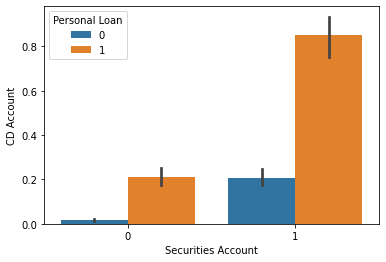

In [547]:
sns.barplot(y="CD Account", x="Securities Account", data=data,hue='Personal Loan')

### Observation
After investigating last 2 graphs , It’s observed that the more accounts the customer has with the bank , the more trustworthy he is and more likely to take a loan.

**Bank and Customer relationship is important.**


### Scaling CCAvg so it would be calculated annually same as income

In [548]:
annual=data['CCAvg']*12
data['ann_CCAvg'] = annual
data.drop('CCAvg', axis=1, inplace=True)
data

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ann_CCAvg
0,1,25,1.0,49,91107,4,1,0,0,1,0,0,0,19.2
1,2,45,19.0,34,90089,3,1,0,0,1,0,0,0,18.0
2,3,39,15.0,11,94720,1,1,0,0,0,0,0,0,12.0
3,4,35,9.0,100,94112,1,2,0,0,0,0,0,0,32.4
4,5,35,8.0,45,91330,4,2,0,0,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3.0,40,92697,1,3,0,0,0,0,1,0,22.8
4996,4997,30,4.0,15,92037,4,1,85,0,0,0,1,0,4.8
4997,4998,63,39.0,24,93023,2,3,0,0,0,0,0,0,3.6
4998,4999,65,40.0,49,90034,3,2,0,0,0,0,1,0,6.0


Text(0.5, 1.0, 'Ann_CCAvg Distribution')

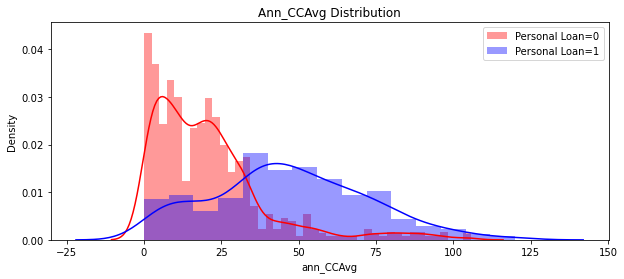

In [549]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["Personal Loan"] == 0]['ann_CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(data[data["Personal Loan"] == 1]['ann_CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Ann_CCAvg Distribution")

### Observation:
Customers who have taken personal loan have higher credit card average than those who did not take loan. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

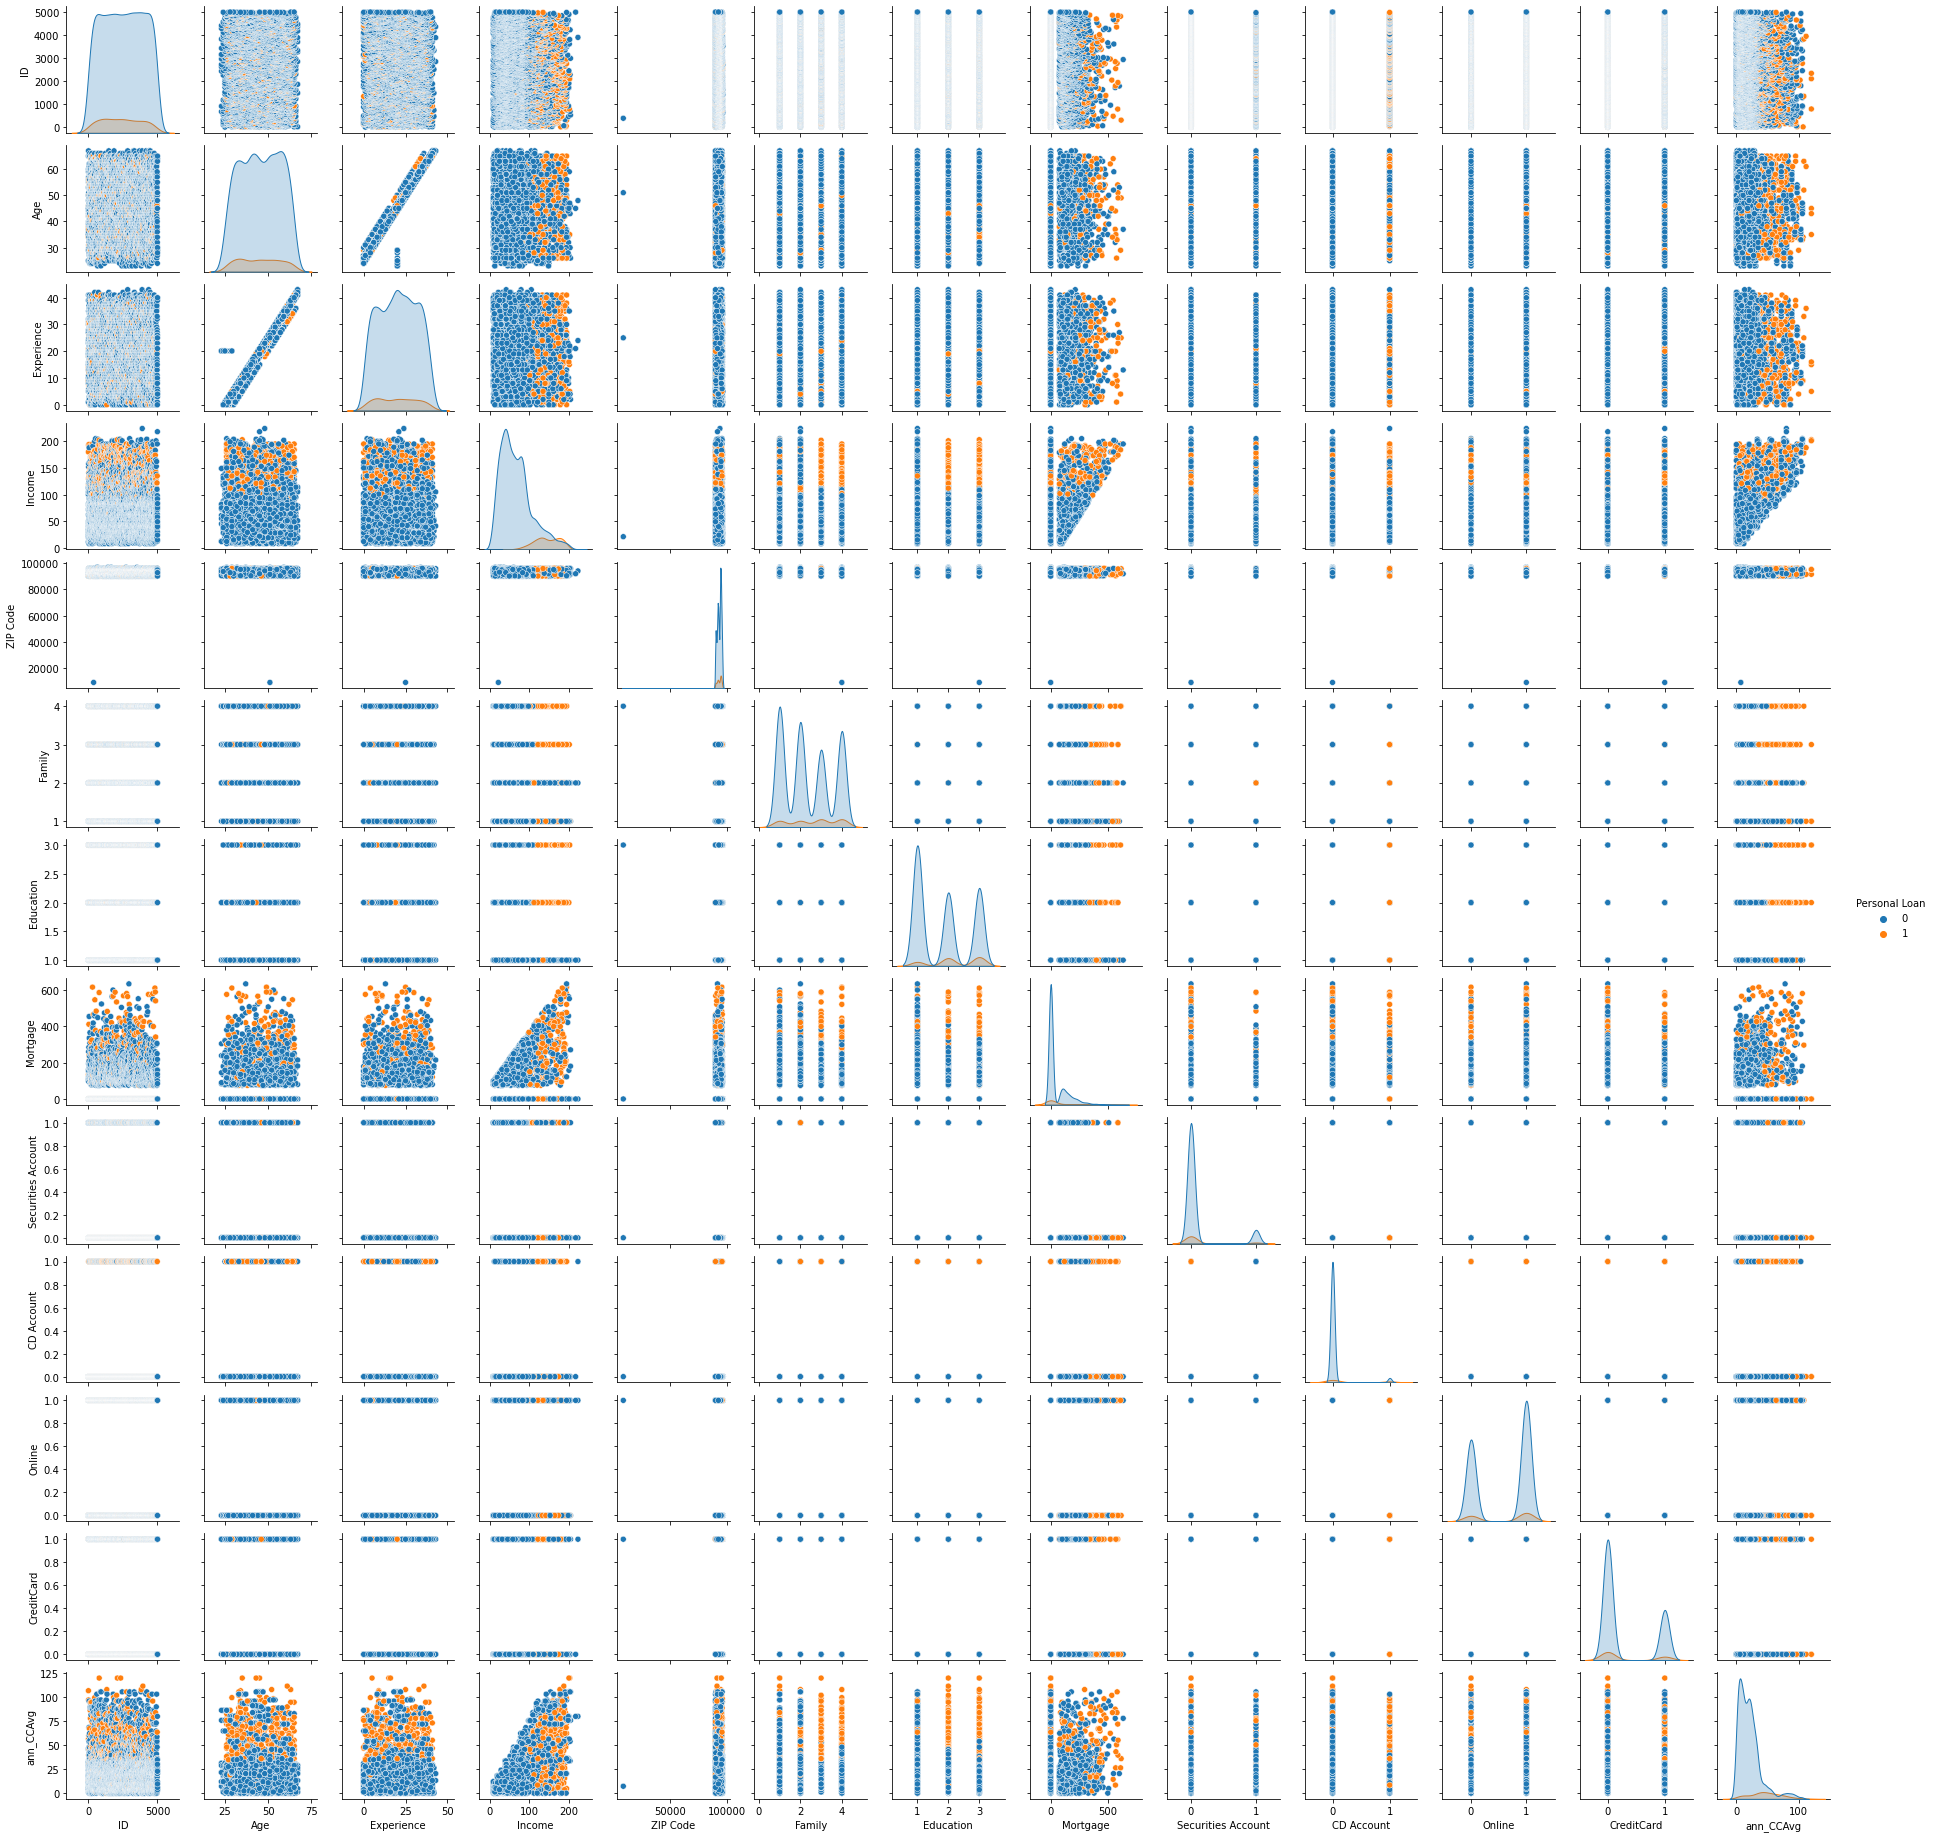

In [550]:
sns.pairplot(data,hue="Personal Loan",height=2, aspect=1) 

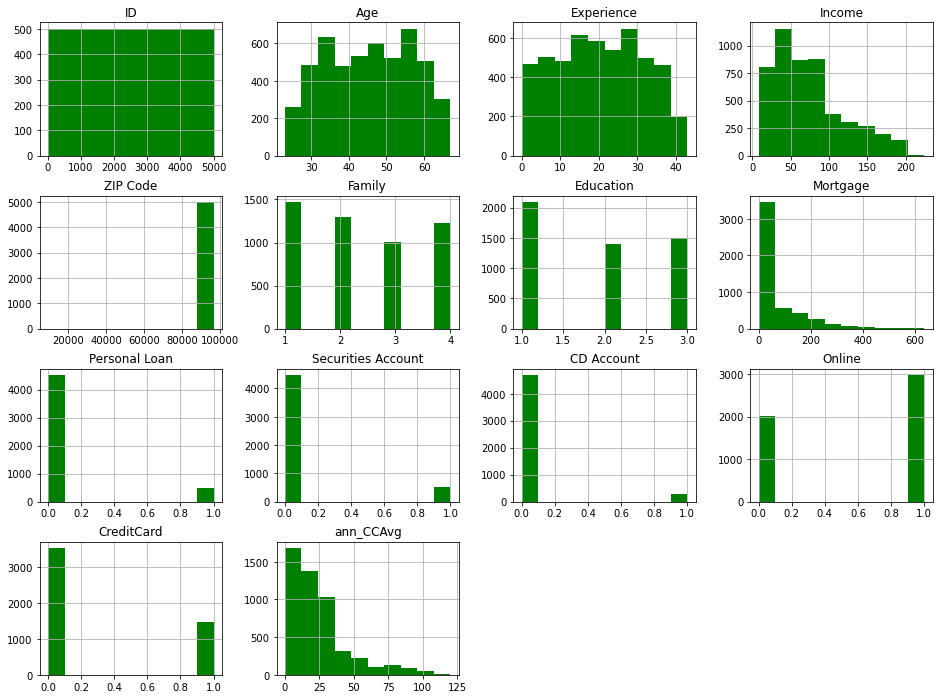

In [551]:
data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

### Observations:
-'Age' column is normally distributed. Here can see that the mean and midean is almost same which we have also seen in the transpose metrics. Most of the customers age is between 25 to 65 years.

-'Experience' is also normally distributed. Here also mean is almost equal to midean. 'Experience' and 'Age' are strong positive association.
-'Income' is positively skewed and it will also have the outlier

-We dont see any relationship with the ZIP Code and other variables.

-Family and Education has low association with the 'Personal Loan'.

-The distribution of ann_CCAvg is also a positively skewed variable. Majority of the customers average annually spending is between 12k to 100k.

-'Mortgage' is also positively skewed. Majority of the individuals have a mortgage of less than 40K.


In [552]:
data.drop(['ID', 'ZIP Code'], axis = 1, inplace=True) 
data

,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,ann_CCAvg
0,25,1.0,49,4,1,0,0,1,0,0,0,19.2
1,45,19.0,34,3,1,0,0,1,0,0,0,18.0
2,39,15.0,11,1,1,0,0,0,0,0,0,12.0
3,35,9.0,100,1,2,0,0,0,0,0,0,32.4
4,35,8.0,45,4,2,0,0,0,0,0,1,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,3,0,0,0,0,1,0,22.8
4996,30,4.0,15,4,1,85,0,0,0,1,0,4.8
4997,63,39.0,24,2,3,0,0,0,0,0,0,3.6
4998,65,40.0,49,3,2,0,0,0,0,1,0,6.0


## Preparing Data for Train Model 
After investigating previous plots , i decided to work on 3 parallel paths (feature selections) to reach the best model to predict whether a liability customer will buy a personal loan or not.

**1-Bank_rel**: Here I depended on customer-bank relationship , no.of accounts , avg spending on credit cards etc…
(PersonalLoan-ann_CCAvg-Mortgage-SecuritiesAccount-CDAccount-Online -CreditCard)

**2-Cust_att**: Here I depended on customer behavior because it could be a good prospect to gain new customers through telemarketing cold calls 
(Personal Loan-Age-Education-Experience-Income)

**3-Whole data excluding Customer id  & Zip-codes**


In [553]:
bank_rel = data[['Personal Loan','ann_CCAvg','Mortgage','Securities Account','CD Account','Online','CreditCard']]
bank_rel

,Personal Loan,ann_CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,19.2,0,1,0,0,0
1,0,18.0,0,1,0,0,0
2,0,12.0,0,0,0,0,0
3,0,32.4,0,0,0,0,0
4,0,12.0,0,0,0,0,1
...,...,...,...,...,...,...,...
4995,0,22.8,0,0,0,1,0
4996,0,4.8,85,0,0,1,0
4997,0,3.6,0,0,0,0,0
4998,0,6.0,0,0,0,1,0


In [554]:
cust_att=data[['Personal Loan','Age','Education','Experience','Income']]
cust_att

,Personal Loan,Age,Education,Experience,Income
0,0,25,1,1.0,49
1,0,45,1,19.0,34
2,0,39,1,15.0,11
3,0,35,2,9.0,100
4,0,35,2,8.0,45
...,...,...,...,...,...
4995,0,29,3,3.0,40
4996,0,30,1,4.0,15
4997,0,63,3,39.0,24
4998,0,65,2,40.0,49


In [555]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
ann_CCAvg             0
dtype: int64

## Spliting the data into training and test set in the ratio of 70:30 for my 3 samples

In [584]:
#Sample 1 - bank_rel
from sklearn.model_selection import train_test_split
X_bank = bank_rel.drop('Personal Loan',axis=1).values
Y_bank = bank_rel['Personal Loan'].values.reshape((-1,1))
X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, Y_bank, test_size=0.30, random_state=1)
print('x train bank_rel {}'.format(X_bank_train.shape))
print('y train bank_rel {}'.format(y_bank_train.shape))
print('x test bank_rel  {}'.format(X_bank_test.shape))
print('y test bank_rel  {}'.format(y_bank_test.shape))

x train bank_rel (3500, 6)
y train bank_rel (3500, 1)
x test bank_rel  (1500, 6)
y test bank_rel  (1500, 1)


In [557]:
#Sample 2 - cust_att
from sklearn.model_selection import train_test_split
X_cust = cust_att.drop('Personal Loan',axis=1).values
Y_cust = cust_att['Personal Loan'].values.reshape((-1,1))
X_cust_train, X_cust_test, y_cust_train, y_cust_test = train_test_split(X_cust, Y_cust, test_size=0.30, random_state=1)
print('x train cust_att {}'.format(X_cust_train.shape))
print('y train cust_att {}'.format(y_cust_train.shape))
print('x test cust_att  {}'.format(X_cust_test.shape))
print('y test cust_att  {}'.format(y_cust_test.shape))

x train cust_att (3500, 4)
y train cust_att (3500, 1)
x test cust_att  (1500, 4)
y test cust_att  (1500, 1)


In [558]:
#Sample 3 - whole Data
from sklearn.model_selection import train_test_split
X = data.drop('Personal Loan',axis=1).values
Y = data['Personal Loan'].values.reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


# Logistic Regression

In [585]:
lr=LogisticRegression(solver='liblinear')

In [586]:
#Sample 1 - bank_rel

lr.fit(X_bank_train,y_bank_train)
y_bank_pred = lr.predict(X_bank_test)
print(lr.score(X_bank_train,y_bank_train))
logreg_bank_accuracy = accuracy_score(y_bank_test, y_bank_pred)*100
print('Logistic Regression Model Accuracy Score Sample 1 - bank_rel : %f'  % logreg_bank_accuracy)



0.9157142857142857
Logistic Regression Model Accuracy Score Sample 1 - bank_rel : 90.266667


In [587]:
print(classification_report(y_bank_test,lr.predict(X_bank_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1351
           1       0.52      0.22      0.31       149

    accuracy                           0.90      1500
   macro avg       0.72      0.60      0.63      1500
weighted avg       0.88      0.90      0.88      1500



In [574]:
#Sample 2 - cust_att

lr.fit(X_cust_train,y_cust_train)
y_cust_pred = lr.predict(X_cust_test)
print(lr.score(X_cust_train,y_cust_train))
logreg_cust_accuracy = accuracy_score(y_cust_test, y_cust_pred)*100
print('Logistic Regression Model Accuracy Score Sample 2 - cust_att : %f'  % logreg_cust_accuracy)

0.9385714285714286
Logistic Regression Model Accuracy Score Sample 2 - cust_att : 93.866667


In [575]:
print(classification_report(y_cust_test,lr.predict(X_cust_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.81      0.50      0.62       149

    accuracy                           0.94      1500
   macro avg       0.88      0.74      0.79      1500
weighted avg       0.93      0.94      0.93      1500



In [576]:
#Sample 3 - whole Data

lr.fit(X_train,y_train)
y_data_pred = lr.predict(X_test)
print(lr.score(X_train,y_train))
logreg_Data_accuracy = accuracy_score(y_test, y_data_pred)*100
print('Logistic Regression Model Accuracy Score Sample 3 - whole Data : %f'  % logreg_Data_accuracy)

0.9497142857142857
Logistic Regression Model Accuracy Score Sample 3 - whole Data : 94.200000


In [577]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.52      0.64       149

    accuracy                           0.94      1500
   macro avg       0.89      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



## Observation 

Accuracy might be high here but it's quite misleading due to low value of recall and precision at which we cannot rely on

# KNN

In [594]:
kclf=KNeighborsClassifier (n_neighbors=5)

In [595]:
#Sample 1 - bank_rel

kclf.fit(X_bank_train,y_bank_train)
y_knn_bank_pred = kclf.predict(X_bank_test)
print(kclf.score(X_bank_train,y_bank_train))
KNN_bank_accuracy = accuracy_score(y_bank_test, y_knn_bank_pred)*100
print('KNN Model Accuracy Score Sample 1 - bank_rel : %f'  % KNN_bank_accuracy)

0.9294285714285714
KNN Model Accuracy Score Sample 1 - bank_rel : 89.600000


In [596]:
print(classification_report(y_bank_test,kclf.predict(X_bank_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1351
           1       0.46      0.27      0.34       149

    accuracy                           0.90      1500
   macro avg       0.69      0.62      0.64      1500
weighted avg       0.88      0.90      0.88      1500



In [597]:
#Sample 2 - cust_att

kclf.fit(X_cust_train,y_cust_train)
y_knn_cust_pred = kclf.predict(X_cust_test)
print(kclf.score(X_cust_train,y_cust_train))
KNN_cust_accuracy = accuracy_score(y_cust_test, y_knn_cust_pred)*100
print('KNN Model Accuracy Score Sample 2 - cust_att : %f'  % KNN_cust_accuracy)

0.9394285714285714
KNN Model Accuracy Score Sample 2 - cust_att : 91.266667


In [598]:
print(classification_report(y_cust_test,kclf.predict(X_cust_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1351
           1       0.60      0.36      0.45       149

    accuracy                           0.91      1500
   macro avg       0.77      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500



In [599]:
#Sample 3 - whole data

kclf.fit(X_train,y_train)
y_knn_Data_pred = kclf.predict(X_test)
print(kclf.score(X_train,y_train))
KNN_Data_accuracy = accuracy_score(y_test, y_knn_Data_pred)*100
print('KNN Model Accuracy Score Sample 3 - whole data : %f'  % KNN_Data_accuracy)

0.9394285714285714
KNN Model Accuracy Score Sample 3 - whole data : 91.333333


In [600]:
print(classification_report(y_test,kclf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1351
           1       0.58      0.48      0.52       149

    accuracy                           0.91      1500
   macro avg       0.76      0.72      0.74      1500
weighted avg       0.91      0.91      0.91      1500



# SVM

### Sample 1 - bank_rel

In [1]:
svm = SVC(C=4 , kernel='linear')

NameError: name 'SVC' is not defined

In [604]:
svm.fit(X_bank_train,y_bank_train)
print(svm.score(X_bank_train,y_bank_train))
print(svm.score(X_bank_test,y_bank_test))
y_cm_bank_pred = svm.predict(X_bank_test)
CM_bank_accuracy = accuracy_score(y_bank_test, y_cm_bank_pred)*100
print('SVM Model Accuracy Score Sample 1 - bank_rel : %f'  % CM_bank_accuracy)

0.912
0.9006666666666666
SVM Model Accuracy Score Sample 1 - bank_rel : 90.066667


In [605]:
confusion_matrix(y_bank_test,svm.predict(X_bank_test))

array([[1329,   22],
       [ 127,   22]], dtype=int64)

In [606]:
print(classification_report(y_bank_test,svm.predict(X_bank_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1351
           1       0.50      0.15      0.23       149

    accuracy                           0.90      1500
   macro avg       0.71      0.57      0.59      1500
weighted avg       0.87      0.90      0.88      1500



### Sample 2 - cust_att

In [607]:
svm.fit(X_cust_train,y_cust_train)
print(svm.score(X_cust_train,y_cust_train))
print(svm.score(X_cust_test,y_cust_test))
y_cm_cust_pred = svm.predict(X_cust_test)
CM_cust_accuracy = accuracy_score(y_cust_test, y_cm_cust_pred)*100
print('SVM Model Accuracy Score Sample 2 - cust_att : %f'  % CM_cust_accuracy)

0.9445714285714286
0.9466666666666667
SVM Model Accuracy Score Sample 2 - cust_att : 94.666667


In [608]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_cust_test,svm.predict(X_cust_test))

array([[1343,    8],
       [  72,   77]], dtype=int64)

In [609]:
print(classification_report(y_cust_test,svm.predict(X_cust_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.91      0.52      0.66       149

    accuracy                           0.95      1500
   macro avg       0.93      0.76      0.81      1500
weighted avg       0.94      0.95      0.94      1500



### Sample 3 - whole Data

In [610]:
svm.fit(X_train,y_train)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))
y_cm_data_pred = svm.predict(X_test)
CM_data_accuracy = accuracy_score(y_test, y_cm_data_pred)*100
print('SVM Model Accuracy Score Sample 3 - whole data : %f'  % CM_data_accuracy)

0.9545714285714286
0.9486666666666667
SVM Model Accuracy Score Sample 3 - whole data : 94.866667


In [612]:
confusion_matrix(y_test,svm.predict(X_test))

array([[1341,   10],
       [  67,   82]], dtype=int64)

In [613]:
print(classification_report(y_test,svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.89      0.55      0.68       149

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.83      1500
weighted avg       0.95      0.95      0.94      1500



# Naive Bayes

In [614]:
gnb= GaussianNB()

### Sample 1 - bank_rel

In [615]:
gnb.fit(X_bank_train,y_bank_train)
print(gnb.score(X_bank_train,y_bank_train))
print(gnb.score(X_bank_test,y_bank_test))
y_gnb_bank_pred = gnb.predict(X_bank_test)
GNB_bank_accuracy = accuracy_score(y_bank_test, y_gnb_bank_pred)*100
print('NB Model Accuracy Score Sample 1 - bank_rel : %f'  % GNB_bank_accuracy)

0.8797142857142857
0.8626666666666667
NB Model Accuracy Score Sample 1 - bank_rel : 86.266667


In [616]:
print(classification_report(y_bank_test,gnb.predict(X_bank_test)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1351
           1       0.33      0.37      0.35       149

    accuracy                           0.86      1500
   macro avg       0.63      0.64      0.64      1500
weighted avg       0.87      0.86      0.87      1500



### Sample 2 - cust_att


In [617]:
gnb.fit(X_cust_train,y_cust_train)
print(gnb.score(X_cust_train,y_cust_train))
print(gnb.score(X_cust_test,y_cust_test))
y_gnb_cust_pred = gnb.predict(X_cust_test)
GNB_cust_accuracy = accuracy_score(y_cust_test, y_gnb_cust_pred)*100
print('NB Model Accuracy Score Sample 2 - Cust_att : %f'  % GNB_cust_accuracy)

0.9222857142857143
0.924
NB Model Accuracy Score Sample 2 - Cust_att : 92.400000


In [619]:
print(classification_report(y_cust_test,gnb.predict(X_cust_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1351
           1       0.66      0.48      0.56       149

    accuracy                           0.92      1500
   macro avg       0.80      0.73      0.76      1500
weighted avg       0.92      0.92      0.92      1500



### Sample 3 - whole Data


In [620]:
gnb.fit(X_train,y_train)
print(gnb.score(X_train,y_train))
print(gnb.score(X_test,y_test))
y_gnb_data_pred = gnb.predict(X_test)
GNB_data_accuracy = accuracy_score(y_test, y_gnb_data_pred)*100
print('NB Model Accuracy Score Sample 3 - Whole-Data : %f'  % GNB_data_accuracy)

0.89
0.8753333333333333
NB Model Accuracy Score Sample 3 - Whole-Data : 87.533333


In [621]:
print(classification_report(y_test,gnb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



# Observations:

### After investigating the above Models on the 3 different samples am working on , we can clearly see that k-Nearest Neighbors Alogorithm gives us best accuracy of 94% on 2 different samples but it's clear that this Accuracy is misleading as all models has low recall and precision therefor we cannot rely on above models for predictions.

# Detecting  Data imbalancing

In [622]:
loan_counts = pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


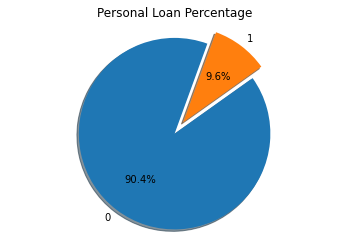

In [623]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
fig1.patch.set_facecolor('white')
plt.show()

### It's Noticed that the data is imbalanced , we will treat the biasing of imbalanced data then recheck the accuracy of our models with comparison with recall and precision

In [625]:
from imblearn.over_sampling import SMOTE
ms=SMOTE(random_state=1)


In [626]:
#Sample 1.1 - bank_rel_res
X_ms_bank , y_ms_bank = ms.fit_resample(X_bank,Y_bank)
from sklearn.model_selection import train_test_split
X_bank_train_res, X_bank_test_res, y_bank_train_res, y_bank_test_res = train_test_split(X_ms_bank, y_ms_bank, test_size=0.30, random_state=1)
y_bank_train_ress=y_bank_train_res.reshape(-1,1)
y_bank_test_ress=y_bank_test_res.reshape(-1,1)
print('x train bank_rel_res {}'.format(X_bank_train_res.shape))
print('y train bank_rel_res {}'.format(y_bank_train_ress.shape))
print('x test bank_rel_res  {}'.format(X_bank_test_res.shape))
print('y test bank_rel_res  {}'.format(y_bank_test_ress.shape))

x train bank_rel_res (6328, 6)
y train bank_rel_res (6328, 1)
x test bank_rel_res  (2712, 6)
y test bank_rel_res  (2712, 1)


In [627]:
#Sample 2.2 - cust_att_res
X_ms_cust , y_ms_cust = ms.fit_resample(X_cust,Y_cust)
from sklearn.model_selection import train_test_split
X_cust_train_res, X_cust_test_res, y_cust_train_res, y_cust_test_res = train_test_split(X_ms_cust, y_ms_cust, test_size=0.30, random_state=1)
y_cust_train_ress=y_cust_train_res.reshape(-1,1)
y_cust_test_ress=y_cust_test_res.reshape(-1,1)
print('x train bank_rel_res {}'.format(X_cust_train_res.shape))
print('y train bank_rel_res {}'.format(y_cust_train_ress.shape))
print('x test bank_rel_res  {}'.format(X_cust_test_res.shape))
print('y test bank_rel_res  {}'.format(y_cust_test_ress.shape))

x train bank_rel_res (6328, 4)
y train bank_rel_res (6328, 1)
x test bank_rel_res  (2712, 4)
y test bank_rel_res  (2712, 1)


In [628]:
#Sample 3.3 -whole data_res
X_ms_data , y_ms_data = ms.fit_resample(X,Y)
from sklearn.model_selection import train_test_split
X_data_train_res, X_data_test_res, y_data_train_res, y_data_test_res = train_test_split(X_ms_data,y_ms_data, test_size=0.30, random_state=1)
y_data_train_ress=y_data_train_res.reshape(-1,1)
y_data_test_ress=y_data_test_res.reshape(-1,1)
print('x train bank_rel_res {}'.format(X_data_train_res.shape))
print('y train bank_rel_res {}'.format(y_data_train_ress.shape))
print('x test bank_rel_res  {}'.format(X_data_test_res.shape))
print('y test bank_rel_res  {}'.format(y_data_test_ress.shape))

x train bank_rel_res (6328, 11)
y train bank_rel_res (6328, 1)
x test bank_rel_res  (2712, 11)
y test bank_rel_res  (2712, 1)


## Logistic Regression After Scaling imbalanced data

In [629]:
lrr=LogisticRegression(solver='liblinear')

In [632]:
#Sample 1.1 - bank_rel_res

lrr.fit(X_bank_train_res,y_bank_train_ress)
y_bank_pred_res = lrr.predict(X_bank_test_res)
print(lrr.score(X_bank_train_res,y_bank_train_ress))
logreg_bank_accuracy_res = accuracy_score(y_bank_test_res, y_bank_pred_res)*100
print('Logistic Regression Model Accuracy Score Sample 1.1 - bank_rel_resamle : %f'  % logreg_bank_accuracy_res,'\n')
print(classification_report(y_bank_test_res,lrr.predict(X_bank_test_res)))

0.7950379266750948
Logistic Regression Model Accuracy Score Sample 1.1 - bank_rel_resamle : 79.609145 

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1350
           1       0.82      0.75      0.79      1362

    accuracy                           0.80      2712
   macro avg       0.80      0.80      0.80      2712
weighted avg       0.80      0.80      0.80      2712



In [633]:
#Sample 2.2 - cust_att_res

lrr.fit(X_cust_train_res,y_cust_train_ress)
y_cust_pred_res = lrr.predict(X_cust_test_res)
print(lrr.score(X_cust_train_res,y_cust_train_ress))
logreg_cust_accuracy_res = accuracy_score(y_cust_test_res, y_cust_pred_res)*100
print('Logistic Regression Model Accuracy Score Sample 2.2 - cust_att_resamle : %f'  % logreg_cust_accuracy_res,'\n')
print(classification_report(y_cust_test_res,lrr.predict(X_cust_test_res)))

0.8697850821744627
Logistic Regression Model Accuracy Score Sample 2.2 - cust_att_resamle : 86.946903 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1350
           1       0.86      0.88      0.87      1362

    accuracy                           0.87      2712
   macro avg       0.87      0.87      0.87      2712
weighted avg       0.87      0.87      0.87      2712



In [634]:
#Sample 3.3 -whole data_res

lrr.fit(X_data_train_res,y_data_train_ress)
y_data_pred_res = lrr.predict(X_data_test_res)
print(lrr.score(X_data_train_res,y_data_train_ress))
logreg_data_accuracy_res = accuracy_score(y_data_test_res, y_data_pred_res)*100
print('Logistic Regression Model Accuracy Score Sample 3.3 -whole data_resamle : %f'  % logreg_data_accuracy_res,'\n')
print(classification_report(y_data_test_res,lrr.predict(X_data_test_res)))

0.9053413400758533
Logistic Regression Model Accuracy Score Sample 3.3 -whole data_resamle : 90.523599 

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1350
           1       0.90      0.91      0.91      1362

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712



# KNN After Scaling imbalanced data

In [654]:
kclsf=KNeighborsClassifier (n_neighbors=1)

In [636]:
#Sample 1.1 - bank_rel_res

kclsf.fit(X_bank_train_res,y_bank_train_ress)
y_knn_bank_pred = kclsf.predict(X_bank_test_res)
print(kclsf.score(X_bank_train_res,y_bank_train_ress))
KNN_bank_accuracy_res = accuracy_score(y_bank_test_res, y_bank_pred_res)*100
print('KNN Model Accuracy Score Sample 1.1 - bank_rel_resample : %f'  % KNN_bank_accuracy_res,'\n')
print(classification_report(y_bank_test_res,kclsf.predict(X_bank_test_res)))

0.959070796460177
KNN Model Accuracy Score Sample 1.1 - bank_rel_resample : 79.609145 

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1350
           1       0.91      0.87      0.89      1362

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



In [637]:
#Sample 2.2 - cust_att_res
kclsf.fit(X_cust_train_res,y_cust_train_ress)
y_knn_cust_pred = kclsf.predict(X_cust_test_res)
print(kclsf.score(X_cust_train_res,y_cust_train_ress))
KNN_cust_accuracy_res = accuracy_score(y_cust_test_res, y_cust_pred_res)*100
print('KNN Model Accuracy Score Sample 2.2 - cust_att_resample : %f'  % KNN_cust_accuracy_res,'\n')
print(classification_report(y_cust_test_res,kclsf.predict(X_cust_test_res)))

0.9987357774968394
KNN Model Accuracy Score Sample 2.2 - cust_att_resample : 86.946903 

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1350
           1       0.90      0.98      0.93      1362

    accuracy                           0.93      2712
   macro avg       0.93      0.93      0.93      2712
weighted avg       0.93      0.93      0.93      2712



In [655]:
#Sample 3.3 -whole data_res
kclsf.fit(X_data_train_res,y_data_train_ress)
y_knn_data_pred = kclsf.predict(X_data_test_res)
print(kclsf.score(X_data_train_res,y_data_train_ress))
KNN_data_accuracy_res = accuracy_score(y_data_test_res, y_data_pred_res)*100
print('KNN Model Accuracy Score Sample 3.3 - whole data_resample : %f'  % KNN_data_accuracy_res,'\n')
print(classification_report(y_data_test_res,kclsf.predict(X_data_test_res)))

1.0
KNN Model Accuracy Score Sample 3.3 - whole data_resample : 90.523599 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1350
           1       0.94      0.99      0.96      1362

    accuracy                           0.96      2712
   macro avg       0.96      0.96      0.96      2712
weighted avg       0.96      0.96      0.96      2712



# SVM After Scaling

### Sample 1.1 - bank_rel_res

In [639]:
svmm = SVC(C=4 , kernel='rbf')


In [645]:
svmm.fit(X_bank_train_res,y_bank_train_ress)
print(svmm.score(X_bank_train_res,y_bank_train_ress))
print(svmm.score(X_bank_test_res,y_bank_test_ress))
y_cm_bank_pred_res = svmm.predict(X_bank_test_res)
CM_bank_accuracy_res = accuracy_score(y_bank_test_ress, y_cm_bank_pred_res)*100
print('CM Model Accuracy Score Sample 1 - bank_rel_resample : %f'  % CM_bank_accuracy_res,'\n')
print(confusion_matrix(y_bank_test_ress,svmm.predict(X_bank_test_res)),'\n')
print(classification_report(y_bank_test_ress,svmm.predict(X_bank_test_res)))

0.7926675094816688
0.7916666666666666
CM Model Accuracy Score Sample 1 - bank_rel_resample : 79.166667 

[[1061  289]
 [ 276 1086]] 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1350
           1       0.79      0.80      0.79      1362

    accuracy                           0.79      2712
   macro avg       0.79      0.79      0.79      2712
weighted avg       0.79      0.79      0.79      2712



### Sample 2.2 - cust_att_res

In [646]:
svmm.fit(X_cust_train_res,y_cust_train_ress)
print(svmm.score(X_cust_train_res,y_cust_train_ress))
print(svmm.score(X_cust_test_res,y_cust_test_ress))
y_cm_cust_pred_res = svmm.predict(X_cust_test_res)
CM_cust_accuracy_res = accuracy_score(y_cust_test_ress, y_cm_cust_pred_res)*100
print('CM Model Accuracy Score Sample 2.2 - cust_att_resample : %f'  % CM_cust_accuracy_res,'\n')
print(confusion_matrix(y_cust_test_ress,svmm.predict(X_cust_test_res)),'\n')
print(classification_report(y_cust_test_ress,svmm.predict(X_cust_test_res)))

0.8762642225031606
0.8738938053097345
CM Model Accuracy Score Sample 2.2 - cust_att_resample : 87.389381 

[[1083  267]
 [  75 1287]] 

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      1350
           1       0.83      0.94      0.88      1362

    accuracy                           0.87      2712
   macro avg       0.88      0.87      0.87      2712
weighted avg       0.88      0.87      0.87      2712



### Sample 3.3 - whole Data_res

In [647]:
svmm.fit(X_data_train_res,y_data_train_ress)
print(svmm.score(X_data_train_res,y_data_train_ress))
print(svmm.score(X_data_test_res,y_data_test_ress))
y_cm_data_pred_res = svmm.predict(X_data_test_res)
CM_data_accuracy_res = accuracy_score(y_data_test_ress, y_cm_data_pred_res)*100
print('CM Model Accuracy Score Sample 3.3 - whole_data_resample : %f'  % CM_data_accuracy_res,'\n')
print(confusion_matrix(y_data_test_ress,svmm.predict(X_data_test_res)),'\n')
print(classification_report(y_data_test_ress,svmm.predict(X_data_test_res)))

0.8889064475347661
0.8890117994100295
CM Model Accuracy Score Sample 3.3 - whole_data_resample : 88.901180 

[[1105  245]
 [  56 1306]] 

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1350
           1       0.84      0.96      0.90      1362

    accuracy                           0.89      2712
   macro avg       0.90      0.89      0.89      2712
weighted avg       0.90      0.89      0.89      2712



# Naive Bayes After Scaling

In [648]:
ganb= GaussianNB()


### Sample 1.1 - bank_rel_res

In [649]:
ganb.fit(X_bank_train_res,y_bank_train_ress)
print(ganb.score(X_bank_train_res,y_bank_train_ress))
print(ganb.score(X_bank_test_res,y_bank_test_ress))
y_gnb_bank_pred_res = ganb.predict(X_bank_test_res)
GNB_bank_accuracy_res = accuracy_score(y_bank_test_ress, y_gnb_bank_pred_res)*100
print('NB Model Accuracy Score Sample 1.1 - bank_rel_resample : %f'  % GNB_bank_accuracy_res,'\n')
print(classification_report(y_bank_test_ress,ganb.predict(X_bank_test_res)))

0.754582806573957
0.7477876106194691
NB Model Accuracy Score Sample 1.1 - bank_rel_resample : 74.778761 

              precision    recall  f1-score   support

           0       0.69      0.88      0.78      1350
           1       0.84      0.62      0.71      1362

    accuracy                           0.75      2712
   macro avg       0.77      0.75      0.74      2712
weighted avg       0.77      0.75      0.74      2712



### Sample 2.2 - cust_att_res

In [650]:
ganb.fit(X_cust_train_res,y_cust_train_res)
print(ganb.score(X_cust_train_res,y_cust_train_res))
print(ganb.score(X_cust_test_res,y_cust_test_ress))
y_gnb_cust_pred_res = ganb.predict(X_cust_test_res)
GNB_cust_accuracy_res = accuracy_score(y_cust_test_ress, y_gnb_cust_pred_res)*100
print('NB Model Accuracy Score Sample 2.2 - cust_att_resample : %f'  % GNB_cust_accuracy_res,'\n')
print(classification_report(y_cust_test_ress,ganb.predict(X_cust_test_res)))

0.8776864728192162
0.8790560471976401
NB Model Accuracy Score Sample 2.2 - cust_att_resample : 87.905605 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1350
           1       0.88      0.88      0.88      1362

    accuracy                           0.88      2712
   macro avg       0.88      0.88      0.88      2712
weighted avg       0.88      0.88      0.88      2712



### Sample 3.3 - whole Data_res

In [651]:
ganb.fit(X_data_train_res,y_data_train_ress)
print(ganb.score(X_data_train_res,y_data_train_ress))
print(ganb.score(X_data_test_res,y_data_test_ress))
y_gnb_data_pred_res = ganb.predict(X_data_test_res)
GNB_data_accuracy_res = accuracy_score(y_data_test_ress, y_gnb_data_pred_res)*100
print('NB Model Accuracy Score Sample 3.3 - Whole-Data_resample : %f'  % GNB_data_accuracy_res,'\n')
print(classification_report(y_data_test_ress,ganb.predict(X_data_test_res)))

0.8596713021491783
0.8547197640117994
NB Model Accuracy Score Sample 3.3 - Whole-Data_resample : 85.471976 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1350
           1       0.88      0.82      0.85      1362

    accuracy                           0.85      2712
   macro avg       0.86      0.85      0.85      2712
weighted avg       0.86      0.85      0.85      2712



# Comparison between Best Model before and after Scaling

### KNN Model in both Cases with the Whole Data Sample is the best

In [668]:
print('               KNN for whole Data Sample Before Scaling','\n',classification_report(y_test,kclf.predict(X_test)),'\n')
print('               KNN for whole Data Sample After Scaling','\n',classification_report(y_data_test_res,kclsf.predict(X_data_test_res)))

               KNN for whole Data Sample Before Scaling 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1351
           1       0.58      0.48      0.52       149

    accuracy                           0.91      1500
   macro avg       0.76      0.72      0.74      1500
weighted avg       0.91      0.91      0.91      1500
 

               KNN for whole Data Sample After Scaling 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1350
           1       0.94      0.99      0.96      1362

    accuracy                           0.96      2712
   macro avg       0.96      0.96      0.96      2712
weighted avg       0.96      0.96      0.96      2712



### Observation
It's Clearly obvious that scaling the imbalanced Data had a great impact on the model as it had enhanced the accuracy besides an outstanding enhancment for the recall and precision which makes it the best model to predict whether the customer liabilty will take a loan or not.

# AUC-ROC Curve

### KNN for whole Data Sample Before Scaling 

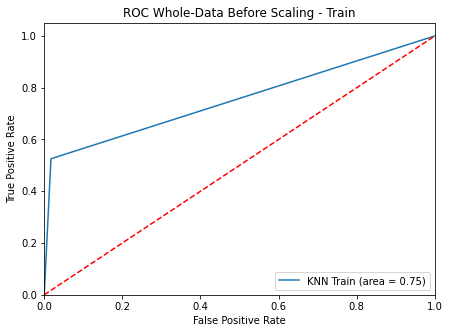

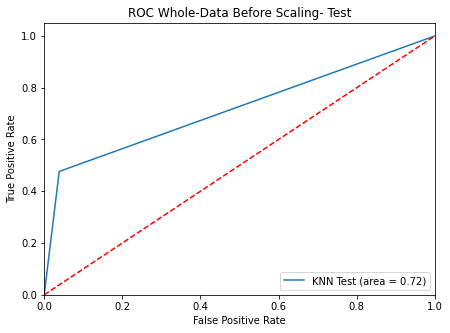

In [674]:
knn_roc_auc_train = roc_auc_score(y_train, kclf.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, kclf.predict(X_train))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='KNN Train (area = %0.2f)' % knn_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Whole-Data Before Scaling - Train')
plt.legend(loc="lower right")
knn_roc_auc_test = roc_auc_score(y_test, kclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, kclf.predict(X_test))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='KNN Test (area = %0.2f)' % knn_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Whole-Data Before Scaling- Test')
plt.legend(loc="lower right")
plt.show()


### KNN for whole Data Sample After Scaling 

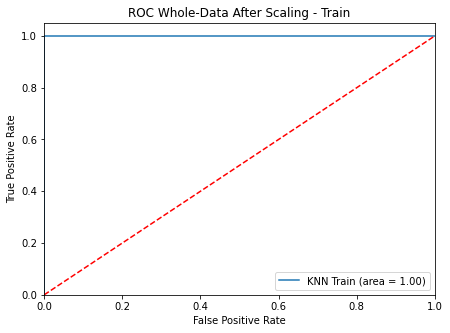

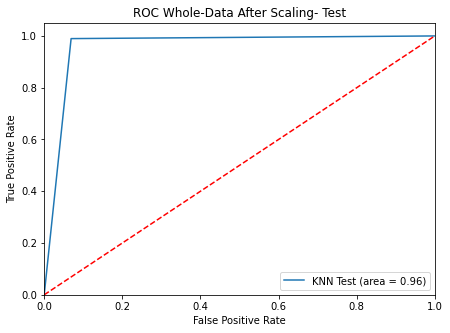

In [675]:
knn_roc_auc_train_res = roc_auc_score(y_data_train_ress, kclsf.predict(X_data_train_res))
fpr, tpr, thresholds = roc_curve(y_data_train_ress, kclsf.predict(X_data_train_res))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='KNN Train (area = %0.2f)' % knn_roc_auc_train_res)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Whole-Data After Scaling - Train')
plt.legend(loc="lower right")
knn_roc_auc_test_res = roc_auc_score(y_data_test_res, kclsf.predict(X_data_test_res))
fpr, tpr, thresholds = roc_curve(y_data_test_res, kclsf.predict(X_data_test_res))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='KNN Test (area = %0.2f)' % knn_roc_auc_test_res)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Whole-Data After Scaling- Test')
plt.legend(loc="lower right")
plt.show()

### Observation
According to previous 4 graphs , then the classifier after scaling is able to perfectly distinguish between all the Positive and the Negative class points correctly.

ROC-AUC score of 1 for train set and 0.96 for test set is an outstanding evaluation for predictions especially with good values for precision and recall indicating there's no biasing in our data and our results for the choosing the best model are to good to misleading.

# Conclusion

-Customers who have income above 100k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.

-For Business Model , we can have different potential profiles for customers.

---High Profile Clients :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending.

---Average Profile :- Medium income group,Graduate level education.3/4Family members,medium spending 

---Low Profile:-Lower income group,undergrads ,0-2Family Member,low spending.

-Customer attribute sample could still be a good potential target with Telemarketing cold calls to get new customers.

-we can clearly see that k-Nearest Neighbors Model with scaled data gives us best accuracy of 96%. With the whole Data Features and we can really rely on predict whether a customer will take a loan or not
